In [1]:
%reload_ext autoreload
%autoreload 2
import zeus.notebook_utils.syspath as syspath
syspath.add_parent_folder()

In [2]:
import random
from typing import Dict, List
import numpy as np
from kidney.datasets.segmentation import read_masked_images
from kidney.utils.plotting import preview
from zeus.plotting.utils import axes
from zeus.utils import read_json

In [3]:
DATA = '/mnt/fast/data/kidney_patches_p1024_s512/'

In [4]:
def show_samples(meta: List[Dict], n: int = 5, size: int = 2):
    items = random.choices(meta, k=n*n)
    grid = axes(subplots=(n, n), figsize=(n*size, n*size))
    for ax, item in zip(grid.flat, items):
        preview(item['image'], item['mask'], ax=ax)

In [5]:
info = read_masked_images(DATA)

In [6]:
info[0]

{'image': '/mnt/fast/data/kidney_patches_p1024_s512/img.0486052bb.0.0.1024.png',
 'position': (0, 0),
 'key': '0486052bb',
 'mask': '/mnt/fast/data/kidney_patches_p1024_s512/seg.0486052bb.0.0.1024.png'}

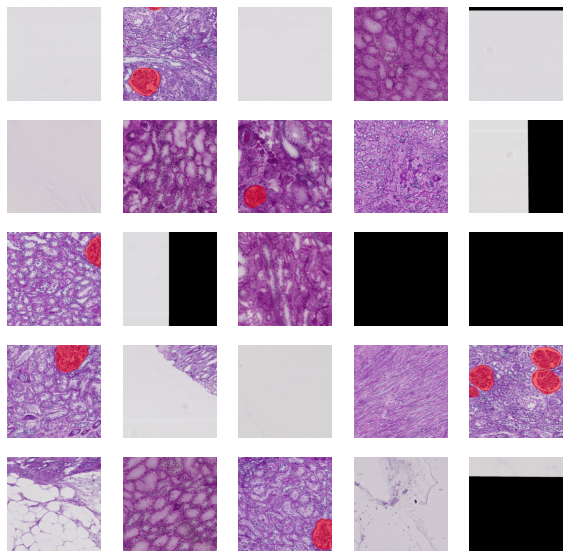

In [7]:
show_samples(info)

In [8]:
meta = read_json(f'{DATA}/histograms.json')

In [9]:
print("Relevance:", np.mean([int(item['relevant']) for item in meta]))

Relevance: 0.5250976744186047


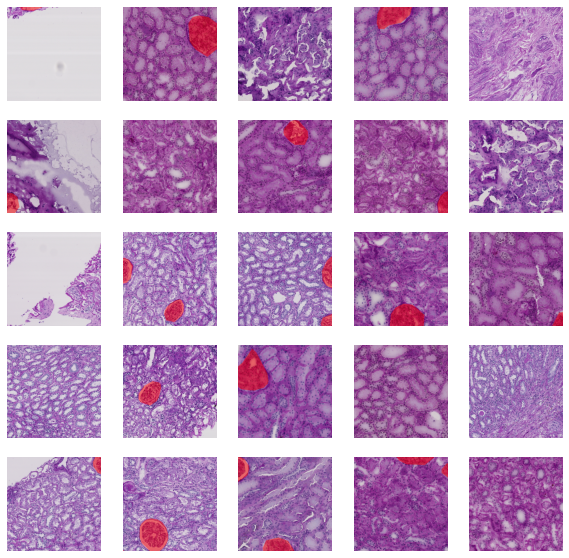

In [10]:
show_samples([item for item in meta if item['relevant']])

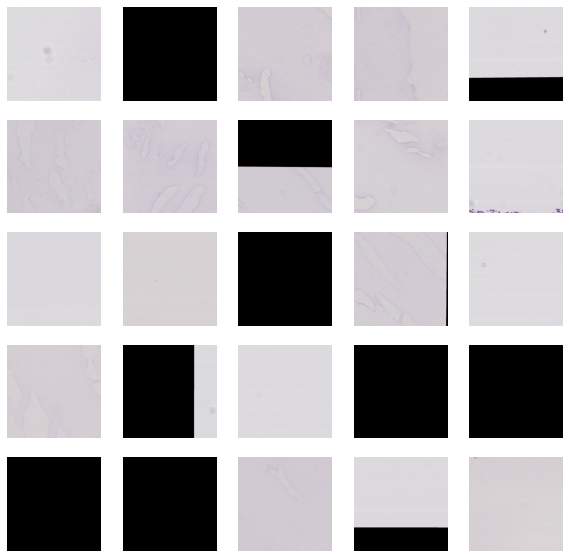

In [11]:
show_samples([item for item in meta if not item['relevant']])